### Analyzing, visualizing and predicting local states in localization problem
### Part-2: Predicting stadard deviations of local states

In this notebook we will use bidirectionl LSTM network for the prediction of standard deviations at different timesteps of a localization problem.  

#### Loading necessary packages

In [2]:
#!pip install tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


#### Loading the training and validation data

In [3]:
series= np.loadtxt('Data/stDev-13to2000grains.txt')

In [4]:
series.shape

(8, 20)

#### Visualization of the training set (5 sets with side length from 28.75 to 108.75 $\mu m$)

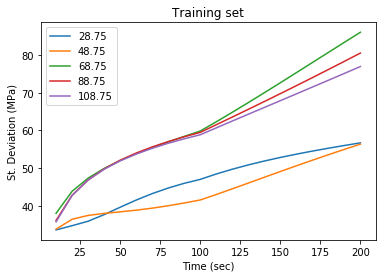

In [5]:
time=range(10,201,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')
#plt.plot(time, series[5],  label='128.75')
#plt.plot(time, series[6],  label='148.75')
#plt.plot(time, series[7],  label='168.75')
plt.xlabel('Time (sec)')
plt.ylabel('St. Deviation (MPa)')
plt.title('Training set')
plt.legend()

plt.show()

#### The above plot shows no reasonable pattern that can be adopted by LSTM net. So instead of 5 sets let's observe 6 sets i.e. till the size of 128.75

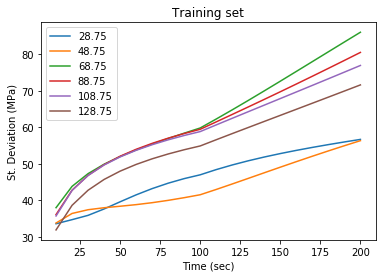

In [6]:
time=range(10,201,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')
plt.plot(time, series[5],  label='128.75')
#plt.plot(time, series[6],  label='148.75')
#plt.plot(time, series[7],  label='168.75')
plt.xlabel('Time (sec)')
plt.ylabel('St. Deviation (MPa)')
plt.title('Training set')
plt.legend()

plt.show()

#### If we exclude the 1st two sets (i.e. for the side length of 28.75 and 48.75 $\mu m$), then we can oberseve a trend eventhough it does not seem very strong. Lets use these 4 sets (3rd, 4th, 5th and 6th) for the training, then predict 7th and 8th set and compare.

#### Preparing the training data according to 2-to-1 LSTM architecture, as we have seen before that this architecture works fine.

In [7]:
#Data from 13g to 900g
Xtrain=np.array([[series[2],series[3]],[series[3],series[4]]])
Ytrain = np.array([series[4],series[5]])
print(Xtrain)
print(Ytrain)

Xtrain.shape

[[[37.98716576 43.82871917 47.31346658 49.89513726 51.99512239
   53.80175424 55.42571049 56.93978175 58.39291199 59.81646343
   62.26844354 64.78623953 67.35989308 69.97802361 72.628954
   75.30179805 77.98654338 80.67451462 83.35815653 86.03118451]
  [36.10058304 42.77404437 46.83932385 49.77283538 52.07443466
   53.97493269 55.59908369 57.02284798 58.29698982 59.45793304
   61.48806421 63.52516677 65.5762787  67.64575949 69.73631408
   71.84893182 73.98353847 76.13914241 78.31421731 80.50685236]]

 [[36.10058304 42.77404437 46.83932385 49.77283538 52.07443466
   53.97493269 55.59908369 57.02284798 58.29698982 59.45793304
   61.48806421 63.52516677 65.5762787  67.64575949 69.73631408
   71.84893182 73.98353847 76.13914241 78.31421731 80.50685236]
  [35.72095289 42.71868233 46.80553262 49.67758268 51.89238247
   53.70080582 55.23513426 56.57219164 57.76006715 58.83069648
   60.65773608 62.47015044 64.27402614 66.07382099 67.87303179
   69.67437033 71.47991406 73.2913045  75.10975247 7

(2, 2, 20)

#### Start the training 

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12    ): #and logs.get('val_loss')<1
      print("\nReached at the expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu',  return_sequences=True, input_shape=(2, 20))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu')),  
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain, Ytrain, epochs=1000, callbacks=[callbacks]) 

Train on 2 samples
Epoch 1/1000
2/2 [==============================] - 4s 2s/sample - loss: 3702.0222
Epoch 2/1000
2/2 [==============================] - 0s 4ms/sample - loss: 3350.6294
Epoch 3/1000
2/2 [==============================] - 0s 4ms/sample - loss: 965.4182
Epoch 4/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1043.2717
Epoch 5/1000
2/2 [==============================] - 0s 6ms/sample - loss: 244.5831
Epoch 6/1000
2/2 [==============================] - 0s 6ms/sample - loss: 189.2215
Epoch 7/1000
2/2 [==============================] - 0s 6ms/sample - loss: 142.0660
Epoch 8/1000
2/2 [==============================] - 0s 5ms/sample - loss: 198.4364
Epoch 9/1000
2/2 [==============================] - 0s 5ms/sample - loss: 210.9223
Epoch 10/1000
2/2 [==============================] - 0s 5ms/sample - loss: 236.3500
Epoch 11/1000
2/2 [==============================] - 0s 7ms/sample - loss: 184.6515
Epoch 12/1000
2/2 [==============================] - 0s 8ms/samp

Epoch 101/1000
2/2 [==============================] - 0s 8ms/sample - loss: 2.0690
Epoch 102/1000
2/2 [==============================] - 0s 0s/sample - loss: 2.0675
Epoch 103/1000
2/2 [==============================] - 0s 16ms/sample - loss: 2.0654
Epoch 104/1000
2/2 [==============================] - 0s 0s/sample - loss: 2.0628
Epoch 105/1000
2/2 [==============================] - 0s 0s/sample - loss: 2.0593
Epoch 106/1000
2/2 [==============================] - 0s 0s/sample - loss: 2.0556
Epoch 107/1000
2/2 [==============================] - 0s 0s/sample - loss: 2.0527
Epoch 108/1000
2/2 [==============================] - 0s 8ms/sample - loss: 2.0504
Epoch 109/1000
2/2 [==============================] - 0s 8ms/sample - loss: 2.0482
Epoch 110/1000
2/2 [==============================] - 0s 8ms/sample - loss: 2.0456
Epoch 111/1000
2/2 [==============================] - 0s 8ms/sample - loss: 2.0430
Epoch 112/1000
2/2 [==============================] - 0s 8ms/sample - loss: 2.0405
Epoch 11

2/2 [==============================] - 0s 0s/sample - loss: 1.8005
Epoch 201/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.7975
Epoch 202/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7944
Epoch 203/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7914
Epoch 204/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7884
Epoch 205/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.7854
Epoch 206/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.7823
Epoch 207/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7793
Epoch 208/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7762
Epoch 209/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7732
Epoch 210/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.7701
Epoch 211/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.7670
Epoch 212/1000
2/2 [====

Epoch 300/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4691
Epoch 301/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4654
Epoch 302/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4618
Epoch 303/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.4581
Epoch 304/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.4545
Epoch 305/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.4508
Epoch 306/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.4472
Epoch 307/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.4435
Epoch 308/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4398
Epoch 309/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4361
Epoch 310/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4324
Epoch 311/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.4287
Epoch 312

Epoch 400/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.0713
Epoch 401/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.0670
Epoch 402/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0626
Epoch 403/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0583
Epoch 404/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0539
Epoch 405/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.0496
Epoch 406/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.0452
Epoch 407/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0408
Epoch 408/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0364
Epoch 409/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0320
Epoch 410/1000
2/2 [==============================] - 0s 8ms/sample - loss: 1.0276
Epoch 411/1000
2/2 [==============================] - 0s 0s/sample - loss: 1.0232
Epoch 412

Epoch 499/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1.0259
Epoch 500/1000
2/2 [==============================] - 0s 7ms/sample - loss: 1.2930
Epoch 501/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1.0059
Epoch 502/1000
2/2 [==============================] - 0s 6ms/sample - loss: 1.2375
Epoch 503/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.9969
Epoch 504/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1.1774
Epoch 505/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1.0115
Epoch 506/1000
2/2 [==============================] - 0s 6ms/sample - loss: 1.1100
Epoch 507/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1.0266
Epoch 508/1000
2/2 [==============================] - 0s 4ms/sample - loss: 1.0591
Epoch 509/1000
2/2 [==============================] - 0s 5ms/sample - loss: 1.0308
Epoch 510/1000
2/2 [==============================] - 0s 6ms/sample - loss: 1.0219
Epoc

Epoch 598/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7710
Epoch 599/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.7687
Epoch 600/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.7664
Epoch 601/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.7641
Epoch 602/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7618
Epoch 603/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7595
Epoch 604/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7572
Epoch 605/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.7549
Epoch 606/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7526
Epoch 607/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7502
Epoch 608/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.7479
Epoch 609/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.7456
Epoc

Epoch 697/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.5431
Epoch 698/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5409
Epoch 699/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5386
Epoch 700/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5363
Epoch 701/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.5341
Epoch 702/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.5318
Epoch 703/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5296
Epoch 704/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.5273
Epoch 705/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5251
Epoch 706/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5228
Epoch 707/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5206
Epoch 708/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.5183
Epoc

Epoch 796/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3324
Epoch 797/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3304
Epoch 798/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.3285
Epoch 799/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3266
Epoch 800/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.3247
Epoch 801/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3228
Epoch 802/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3209
Epoch 803/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.3190
Epoch 804/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3171
Epoch 805/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3152
Epoch 806/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3133
Epoch 807/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.3114
Epoc

Epoch 895/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.1716
Epoch 896/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.1703
Epoch 897/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.1690
Epoch 898/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.1678
Epoch 899/1000
2/2 [==============================] - 0s 4ms/sample - loss: 0.1665
Epoch 900/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.1653
Epoch 901/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.1640
Epoch 902/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.1628
Epoch 903/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.1616
Epoch 904/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.1604
Epoch 905/1000
2/2 [==============================] - 0s 5ms/sample - loss: 0.1592
Epoch 906/1000
2/2 [==============================] - 0s 6ms/sample - loss: 0.1580
Epoc

#### Since we already have the real list of $\sigma$, we can predict and compare the 7th set

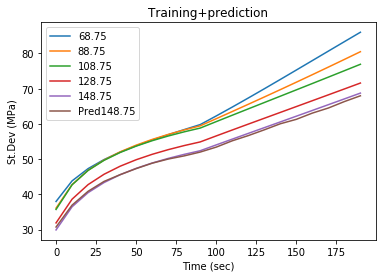

In [11]:
x5=np.array([[series[4],series[5]]])
y5=model.predict(x5)

time=range(0,200,10)

plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')
plt.plot(time, series[5],  label='128.75')
plt.plot(time, series[6],  label='148.75')
plt.plot(time, y5[0],  label='Pred148.75')  

plt.xlabel('Time (sec)')
plt.ylabel('St.Dev (MPa)')
plt.title('Training+prediction')
plt.legend()

plt.show()

#### The above plot shows a great prediction, let's retrain the network including the predicted one and then predict the 8th set.

#### Rearraning the training data

In [12]:
Xtrain1=np.array([[series[2],series[3]],[series[3],series[4]],[series[4],series[5]]])
Ytrain1 = np.array([series[4],series[5],y5[0]])
Ytrain1

array([[35.72095289, 42.71868233, 46.80553262, 49.67758268, 51.89238247,
        53.70080582, 55.23513426, 56.57219164, 57.76006715, 58.83069648,
        60.65773608, 62.47015044, 64.27402614, 66.07382099, 67.87303179,
        69.67437033, 71.47991406, 73.2913045 , 75.10975247, 76.93615886],
       [31.90080675, 38.63643348, 42.77071742, 45.72174153, 47.99501464,
        49.83361066, 51.37330036, 52.69703677, 53.85871767, 54.89492386,
        56.5973204 , 58.27901361, 59.94829802, 61.61090459, 63.27087354,
        64.93117309, 66.59383329, 68.26044392, 69.93209271, 71.60958762],
       [30.73477554, 36.94788361, 40.87417603, 43.68714523, 45.59593201,
        47.31784439, 48.85573196, 50.03094864, 50.93050766, 52.01660919,
        53.41930008, 55.21233749, 56.68716431, 58.32867432, 60.04789352,
        61.30756378, 63.07733917, 64.51885986, 66.35081482, 67.99345398]])

#### Start the training with the same architecture and hyperparameters...

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12    ): #and logs.get('val_loss')<1
      print("\nReached at the expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu',  return_sequences=True, input_shape=(2, 20))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu')),  
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain1, Ytrain1, epochs=1000, callbacks=[callbacks]) 

Train on 3 samples
Epoch 1/1000
3/3 [==============================] - 3s 1s/sample - loss: 3267.2256
Epoch 2/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2838.6238
Epoch 3/1000
3/3 [==============================] - 0s 3ms/sample - loss: 1600.1094
Epoch 4/1000
3/3 [==============================] - 0s 5ms/sample - loss: 814.6551
Epoch 5/1000
3/3 [==============================] - 0s 4ms/sample - loss: 564.8152
Epoch 6/1000
3/3 [==============================] - 0s 3ms/sample - loss: 257.7834
Epoch 7/1000
3/3 [==============================] - 0s 3ms/sample - loss: 330.2416
Epoch 8/1000
3/3 [==============================] - 0s 3ms/sample - loss: 177.0021
Epoch 9/1000
3/3 [==============================] - 0s 3ms/sample - loss: 159.0301
Epoch 10/1000
3/3 [==============================] - 0s 5ms/sample - loss: 165.6179
Epoch 11/1000
3/3 [==============================] - 0s 3ms/sample - loss: 90.2972
Epoch 12/1000
3/3 [==============================] - 0s 4ms/sampl

Epoch 101/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.0658
Epoch 102/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.0573
Epoch 103/1000
3/3 [==============================] - 0s 5ms/sample - loss: 2.0560
Epoch 104/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0488
Epoch 105/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0482
Epoch 106/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0420
Epoch 107/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0414
Epoch 108/1000
3/3 [==============================] - 0s 8ms/sample - loss: 2.0354
Epoch 109/1000
3/3 [==============================] - 0s 4ms/sample - loss: 2.0339
Epoch 110/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0287
Epoch 111/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0273
Epoch 112/1000
3/3 [==============================] - 0s 3ms/sample - loss: 2.0222
Epoc

Epoch 200/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6793
Epoch 201/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6748
Epoch 202/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6704
Epoch 203/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6659
Epoch 204/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6614
Epoch 205/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6569
Epoch 206/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6524
Epoch 207/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6479
Epoch 208/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.6434
Epoch 209/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6388
Epoch 210/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6343
Epoch 211/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.6297
Epoch

Epoch 300/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1742
Epoch 301/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.1686
Epoch 302/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1630
Epoch 303/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.1574
Epoch 304/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1517
Epoch 305/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1461
Epoch 306/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.1405
Epoch 307/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.1348
Epoch 308/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.1292
Epoch 309/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1235
Epoch 310/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1180
Epoch 311/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1125
Epoch 312

3/3 [==============================] - 0s 0s/sample - loss: 1.2384
Epoch 400/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.2359
Epoch 401/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.2293
Epoch 402/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.2289
Epoch 403/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.2210
Epoch 404/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.2215
Epoch 405/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.2132
Epoch 406/1000
3/3 [==============================] - 0s 0s/sample - loss: 1.2140
Epoch 407/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.2057
Epoch 408/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.2064
Epoch 409/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1985
Epoch 410/1000
3/3 [==============================] - 0s 5ms/sample - loss: 1.1987
Epoch 411/1000
3/3 [====

Epoch 499/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8661
Epoch 500/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8623
Epoch 501/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8584
Epoch 502/1000
3/3 [==============================] - 0s 0s/sample - loss: 0.8546
Epoch 503/1000
3/3 [==============================] - 0s 0s/sample - loss: 0.8507
Epoch 504/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8469
Epoch 505/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8430
Epoch 506/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8391
Epoch 507/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8353
Epoch 508/1000
3/3 [==============================] - 0s 0s/sample - loss: 0.8314
Epoch 509/1000
3/3 [==============================] - 0s 0s/sample - loss: 0.8276
Epoch 510/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8237
Epoch 51

3/3 [==============================] - 0s 3ms/sample - loss: 0.5337
Epoch 599/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5296
Epoch 600/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5296
Epoch 601/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5227
Epoch 602/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5189
Epoch 603/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5180
Epoch 604/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5121
Epoch 605/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.5083
Epoch 606/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5068
Epoch 607/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.5017
Epoch 608/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.4979
Epoch 609/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.4959
Epoch 610/1000
3/3 

Epoch 697/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3239
Epoch 698/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3837
Epoch 699/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.4050
Epoch 700/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3722
Epoch 701/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3156
Epoch 702/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.2688
Epoch 703/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2546
Epoch 704/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2708
Epoch 705/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2993
Epoch 706/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3210
Epoch 707/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3232
Epoch 708/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3084
Epoc

Epoch 796/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3383
Epoch 797/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3144
Epoch 798/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3325
Epoch 799/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3205
Epoch 800/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3063
Epoch 801/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3195
Epoch 802/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.3066
Epoch 803/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2979
Epoch 804/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.3066
Epoch 805/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.2951
Epoch 806/1000
3/3 [==============================] - 0s 4ms/sample - loss: 0.2890
Epoch 807/1000
3/3 [==============================] - 0s 3ms/sample - loss: 0.2946
Epoc

Epoch 895/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.1234
Epoch 896/1000
3/3 [==============================] - 0s 0s/sample - loss: 0.1225
Epoch 897/1000
3/3 [==============================] - 0s 0s/sample - loss: 0.1217
Epoch 898/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.1209
Epoch 899/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.1201
Epoch 900/1000

Reached expected accuracy level, so cancelling training!
3/3 [==============================] - 0s 5ms/sample - loss: 0.1193


#### Lets predict the 8th set and compare with the true data

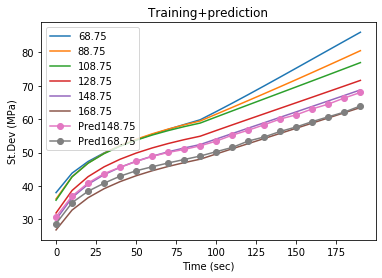

In [23]:
x6=np.array([[series[5],y5[0]]])
y6=model.predict(x6)

time=range(0,200,10)

plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')
plt.plot(time, series[5],  label='128.75')
plt.plot(time, series[6],  label='148.75')
plt.plot(time, series[7],  label='168.75')
plt.plot(time, y5[0], 'o-',  label='Pred148.75') 
plt.plot(time, y6[0], 'o-', label='Pred168.75')

plt.xlabel('Time (sec)')
plt.ylabel('St.Dev (MPa)')
plt.title('Training+prediction')
plt.legend()

plt.show()

#### Training and prediction sets are shown together in the above graph. Eventhough we see a smaller amount of relative error in the the prediciton of 8th set, nevertheless, it is demostrated that we can accurately predict the local states of a SERVE in a localization problem using the a non SERVE.